In [ ]:
'''
LDA : Linear Discriminant Analysis
    - Linear Discriminant Analysis or Normal Discriminant Analysis or Discriminant Function Analysis
    - It is a dimensionality reduction technique that is commonly used for supervised classification problems
    - It is used to project the features in higher dimension space into a lower dimension space
    - LDA supports both binary and multi-class classification

In [ ]:
'''
Extensions to LDA: 
    - Quadratic Discriminant Analysis (QDA)
    - Flexible Discriminant Analysis (FDA)
    - Regularized Discriminant Analysis (RDA)

In [ ]:
'''
Assumption 
    - Assumes the data to be distributed normally or Gaussian distribution of data points i.e. each feature must make a 
      bell-shaped curve when plotted. 
    - Each of the classes has identical covariance matrices.


In [ ]:
'''
How to Prepare Data for LDA
    - Classification Problems
        - Supports Binary and Multiclass Classifcation
    - Gaussian Distribution
        - The standard implementation of the model assumes a Gaussian distribution of the input variables.
    - Remove Outliers
    - Same Variance
        - Assumes that each input variable has the same variance (standardize data)

### CLassification using LDA

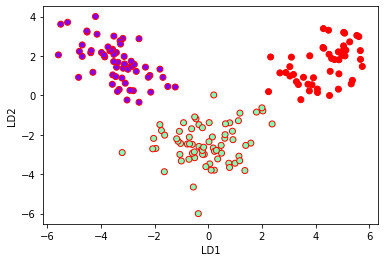

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_wine
dt = load_wine()
X = dt.data
y = dt.target

lda = LinearDiscriminantAnalysis()
lda_t = lda.fit_transform(X,y)

lda.explained_variance_ratio_

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(lda_t[:,0],lda_t[:,1],c=y,cmap='rainbow',edgecolors='r')
plt.show()

1.0


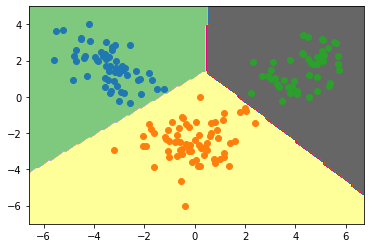

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
lda.fit(X_train,y_train)

y_pred = lda.predict(X_test)
print(accuracy_score(y_test,y_pred))

confusion_matrix(y_test,y_pred)

min1,max1 = lda_t[:,0].min()-1, lda_t[:,0].max()+1
min2,max2 = lda_t[:,1].min()-1,lda_t[:,1].max()+1
x1grid = np.arange(min1,max1,0.1)
x2grid = np.arange(min2,max2,0.1)
xx,yy = np.meshgrid(x1grid,x2grid)
r1,r2 = xx.flatten(),yy.flatten()
r1,r2 = r1.reshape((len(r1),1)), r2.reshape((len(r2),1))
grid = np.hstack((r1,r2))

model = LinearDiscriminantAnalysis()
model.fit(lda_t,y)
yhat = model.predict(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx,yy,zz,cmap='Accent')

for class_value in range(3):
  row_ix = np.where( y== class_value)
  plt.scatter(lda_t[row_ix,0],lda_t[row_ix,1])